In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report


random_state = 27

In [2]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(f'data/{category}'): #path to the folders with data
            img = cv2.imread(f'data/{category}/{image_name}') #path to the folders
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

            img_array = cv2.resize(img, (150,150)) 

            img_lst.append(img_array)
            labels.append(index)
    return img_lst, labels

categories = ['disco', 'electro', 'folk', 'rap', 'rock'] 

img_lst, labels = load_images_and_labels(categories)




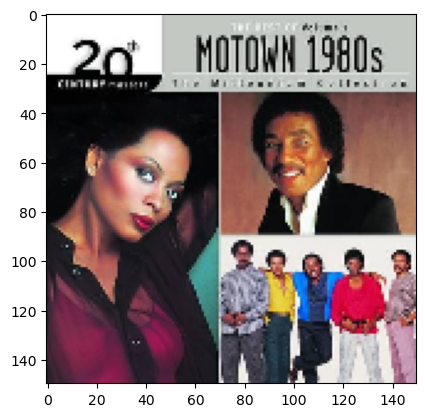

In [3]:
plt.imshow(img_lst[27])
plt.show()

In [3]:
images = np.array(img_lst) / 255.0 #normalization
labels = to_categorical(labels)  #one hot encoding


In [4]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.4, random_state=random_state)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=random_state)


In [6]:
print("x_train shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)


print("x_test shape: ", x_test.shape)
print("y_test.shape: ", y_test.shape)

print("x_test shape: ", x_val.shape)
print("y_test.shape: ", y_val.shape)

x_train shape:  (4468, 150, 150, 3)
y_train.shape:  (4468, 5)
x_test shape:  (3725, 150, 150, 3)
y_test.shape:  (3725, 5)
x_test shape:  (1118, 150, 150, 3)
y_test.shape:  (1118, 5)


In [21]:
#from keras.applications.vgg16 import VGG16
#from keras.applications.densenet import DenseNet121
from keras.applications.xception import Xception



from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Load VGG16 model, InceptionV3 (0.43), DenseNet

baseModel = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the base model
for layer in baseModel.layers:
    layer.trainable = False

# Create the top layers that will be trained
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(32, activation="relu")(headModel)
headModel = Dropout(0.1)(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.1)(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(5, activation="softmax")(headModel)

# Put together the base model with the new layers
model = Model(inputs=baseModel.input, outputs=headModel)

# Compile the model with Adam optimizer
optimizer = Adam(lr=0.00001, decay=0.0001 / 20)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Fit the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val), callbacks= [early_stopping])


c:\Users\Kasia\anaconda3\envs\dl\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
140/140 [==============================] - 131s 880ms/step - loss: 1.5950 - accuracy: 0.2504 - val_loss: 1.5542 - val_accuracy: 0.3247
Epoch 2/20
140/140 [==============================] - 121s 868ms/step - loss: 1.5137 - accuracy: 0.3440 - val_loss: 1.4814 - val_accuracy: 0.3953
Epoch 3/20
140/140 [==============================] - 123s 878ms/step - loss: 1.4422 - accuracy: 0.3874 - val_loss: 1.4308 - val_accuracy: 0.4097
Epoch 4/20
140/140 [==============================] - 122s 871ms/step - loss: 1.3847 - accuracy: 0.4291 - val_loss: 1.4023 - val_accuracy: 0.4383
Epoch 5/20
140/140 [==============================] - 123s 876ms/step - loss: 1.3374 - accuracy: 0.4534 - val_loss: 1.3910 - val_accuracy: 0.4302
Epoch 6/20
140/140 [==============================] - 125s 897ms/step - loss: 1.2912 - accuracy: 0.4881 - val_loss: 1.3795 - val_accuracy: 0.4392
Epoch 7/20
140/140 [==============================] - 120s 861ms/step - loss: 1.2505 - accuracy: 0.5101 - val_loss: 1.3593 -

In [6]:
from keras.layers import BatchNormalization

In [8]:
model = Sequential()

# Add model layers
# Convolution layer to extract features from the input image, and then create 32 5x5 ReLu convoluted features
# The input shape is the (150, 150, 3) because the images are 150x150 pixels and have three color channels.
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(150, 150, 3)))
#model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
# Pooling layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to flatten the 2D arrays to 1D array before building the fully connected layers
model.add(Flatten())

# Add layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))

# Add the output layer with 5 units and a softmax activation function
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))


model.summary()


In [ ]:
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

# Set a learning rate
learning_rate = 0.001
num_epochs = 50
decay_rate = learning_rate / num_epochs

# Create an SGD optimizer with the set learning rate and decay
optimizer = SGD(lr=learning_rate, decay=decay_rate)

# Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])


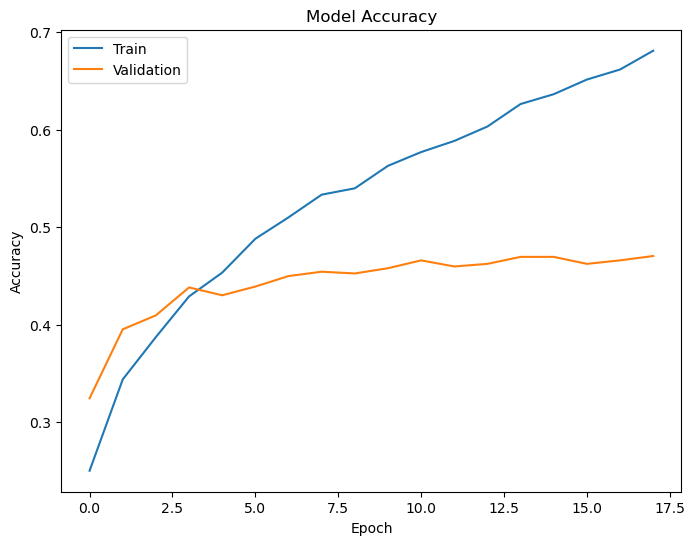

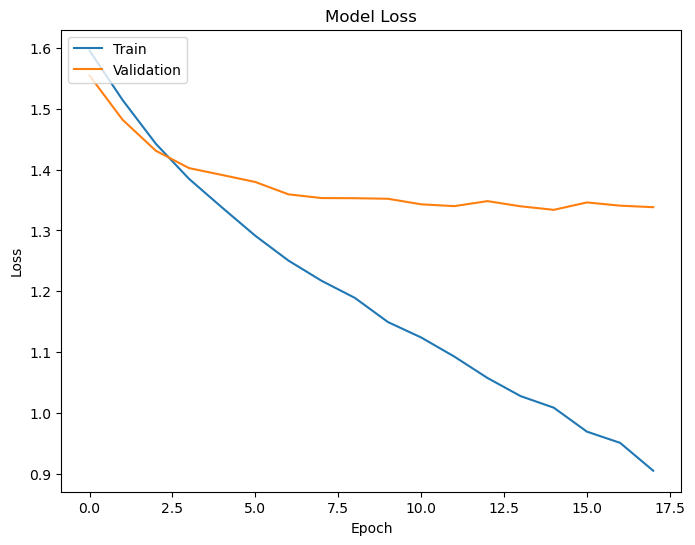

In [22]:
# summarize history for accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


DenseNet121

In [23]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

117/117 [==============================] - 93s 780ms/step
              precision    recall  f1-score   support

           0       0.53      0.45      0.49       719
           1       0.49      0.55      0.51       752
           2       0.44      0.48      0.46       777
           3       0.49      0.43      0.46       732
           4       0.41      0.43      0.42       745

    accuracy                           0.47      3725
   macro avg       0.47      0.47      0.47      3725
weighted avg       0.47      0.47      0.47      3725



In [24]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'


Xception

In [20]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

117/117 [==============================] - 83s 692ms/step
              precision    recall  f1-score   support

           0       0.59      0.28      0.38       719
           1       0.53      0.31      0.39       752
           2       0.54      0.32      0.40       777
           3       0.26      0.77      0.38       732
           4       0.34      0.12      0.18       745

    accuracy                           0.36      3725
   macro avg       0.45      0.36      0.35      3725
weighted avg       0.45      0.36      0.35      3725









Hisotry:


weighted avg 0.29, 0.31